# Traffic dataset

In [2]:
import pandas as pd
import numpy as np
import datetime
import json

from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colrs

plt.rcParams['font.size'] = 18

## Constants

In [3]:
city_dims = {
    'Bordeaux': (334, 342),
    'Clermont-Ferrand': (208, 268),
    'Dijon': (195, 234),
    'Grenoble': (409, 251),
    'Lille': (330, 342),
    'Lyon': (426, 287),
    'Mans': (228, 246),
    'Marseille': (211, 210),
    'Metz': (226, 269),
    'Montpellier': (334, 327),
    'Nancy': (151, 165),
    'Nantes': (277, 425),
    'Nice': (150, 214),
    'Orleans': (282, 256),
    'Paris': (409, 346),
    'Rennes': (423, 370),
    'Saint-Etienne': (305, 501),
    'Strasbourg': (296, 258),
    'Toulouse': (280, 347),
    'Tours': (251, 270)
    }

## Load data

In [4]:
#data for march 12th 2019, monday,  after the season 9 of fortnite was released


day_str = '20190513' 
city_str = 'Paris'
app_str = 'Fortnite'

# downlink traffic file
traffic_file_dn = f'./data/{city_str}_{app_str}_{day_str}_DL.txt'

# let's make a list of 15 min time intervals to use as column names
day = datetime.datetime.strptime(day_str, '%Y%m%d')
times = [day + datetime.timedelta(minutes=15*i) for i in range(96)]
times_str = [t.strftime('%H:%M') for t in times]

# column names
columns = ['tile_id'] + times_str

# let's load the data of the downlink traffic
df_traffic_dn = pd.read_csv(traffic_file_dn, sep=' ', names=columns)
df_traffic_dn.head(10)

tile_id  00:00  00:15  00:30  00:45  01:00  01:15  01:30  01:45  02:00  \
0      162      9      8     17      7      1      0      0      0      0   
1      507     10      9     13      8      0      0      0      0      0   
2      508     10      9     14      8      2      0      0      0      0   
3      853      7      7     10      7      0      0      0      0      0   
4      854      7      7     11      8      2      0      0      0      0   
5      855      8      8     13      8      2      0      0      0      0   
6     1199      6      6      9      6      0      0      0      0      0   
7     1200      6      6      9      7      1      0      0      0      0   
8     1201      8      7     11      8      3      0      0      0      0   
9     1545      6      5      7      6      0      0      0      0      0   

   ...  21:30  21:45  22:00  22:15  22:30  22:45  23:00  23:15  23:30  23:45  
0  ...      2      0      0      0      0      0      0      0      0      0  
1  ...      2      0      0      0      0      0      0      0      0      0  
2  ...      2      0      0      0      0      0      0      0      0      0  
3  ...      2      0      0      0      0      0      0      0      0      0  
4  ...      3      0      0      0      0      0      0      0      0      0  
5  ...      2      0      0      0      0      0      0      1      0      0  
6  ...      2      0      0      0      0      0      0      0      0      0  
7  ...      2      0      0      0      0      0      0      0      0      0  
8  ...      3      0      0      0      0      0      0      1      0      0  
9  ...      2      0      0      0      0      0      0      0      0      0  

[10 rows x 97 columns]

### Matrix representation

In [5]:
# fetch the number of rows and columns of the city
n_rows, n_cols = city_dims[city_str]

# create a 3D array to store the traffic values
# the first dimension is the time, the second and third are the rows and columns (spatial dimensions)
city_traffic = np.zeros((len(times_str), n_rows, n_cols))

# fill the array with the traffic values
for _, row in df_traffic_dn.iterrows():
    tile_id = row['tile_id']
    row_index = int(tile_id // n_cols)
    col_index = int(tile_id % n_cols)

    traffic_values = np.array(row[times_str])
    city_traffic[:, row_index, col_index] = traffic_values

## Plot the traffic map

C:\Users\ماهر بكر\AppData\Local\Temp\ipykernel_14704\780326874.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_traffic = cm.get_cmap('Spectral_r').copy()


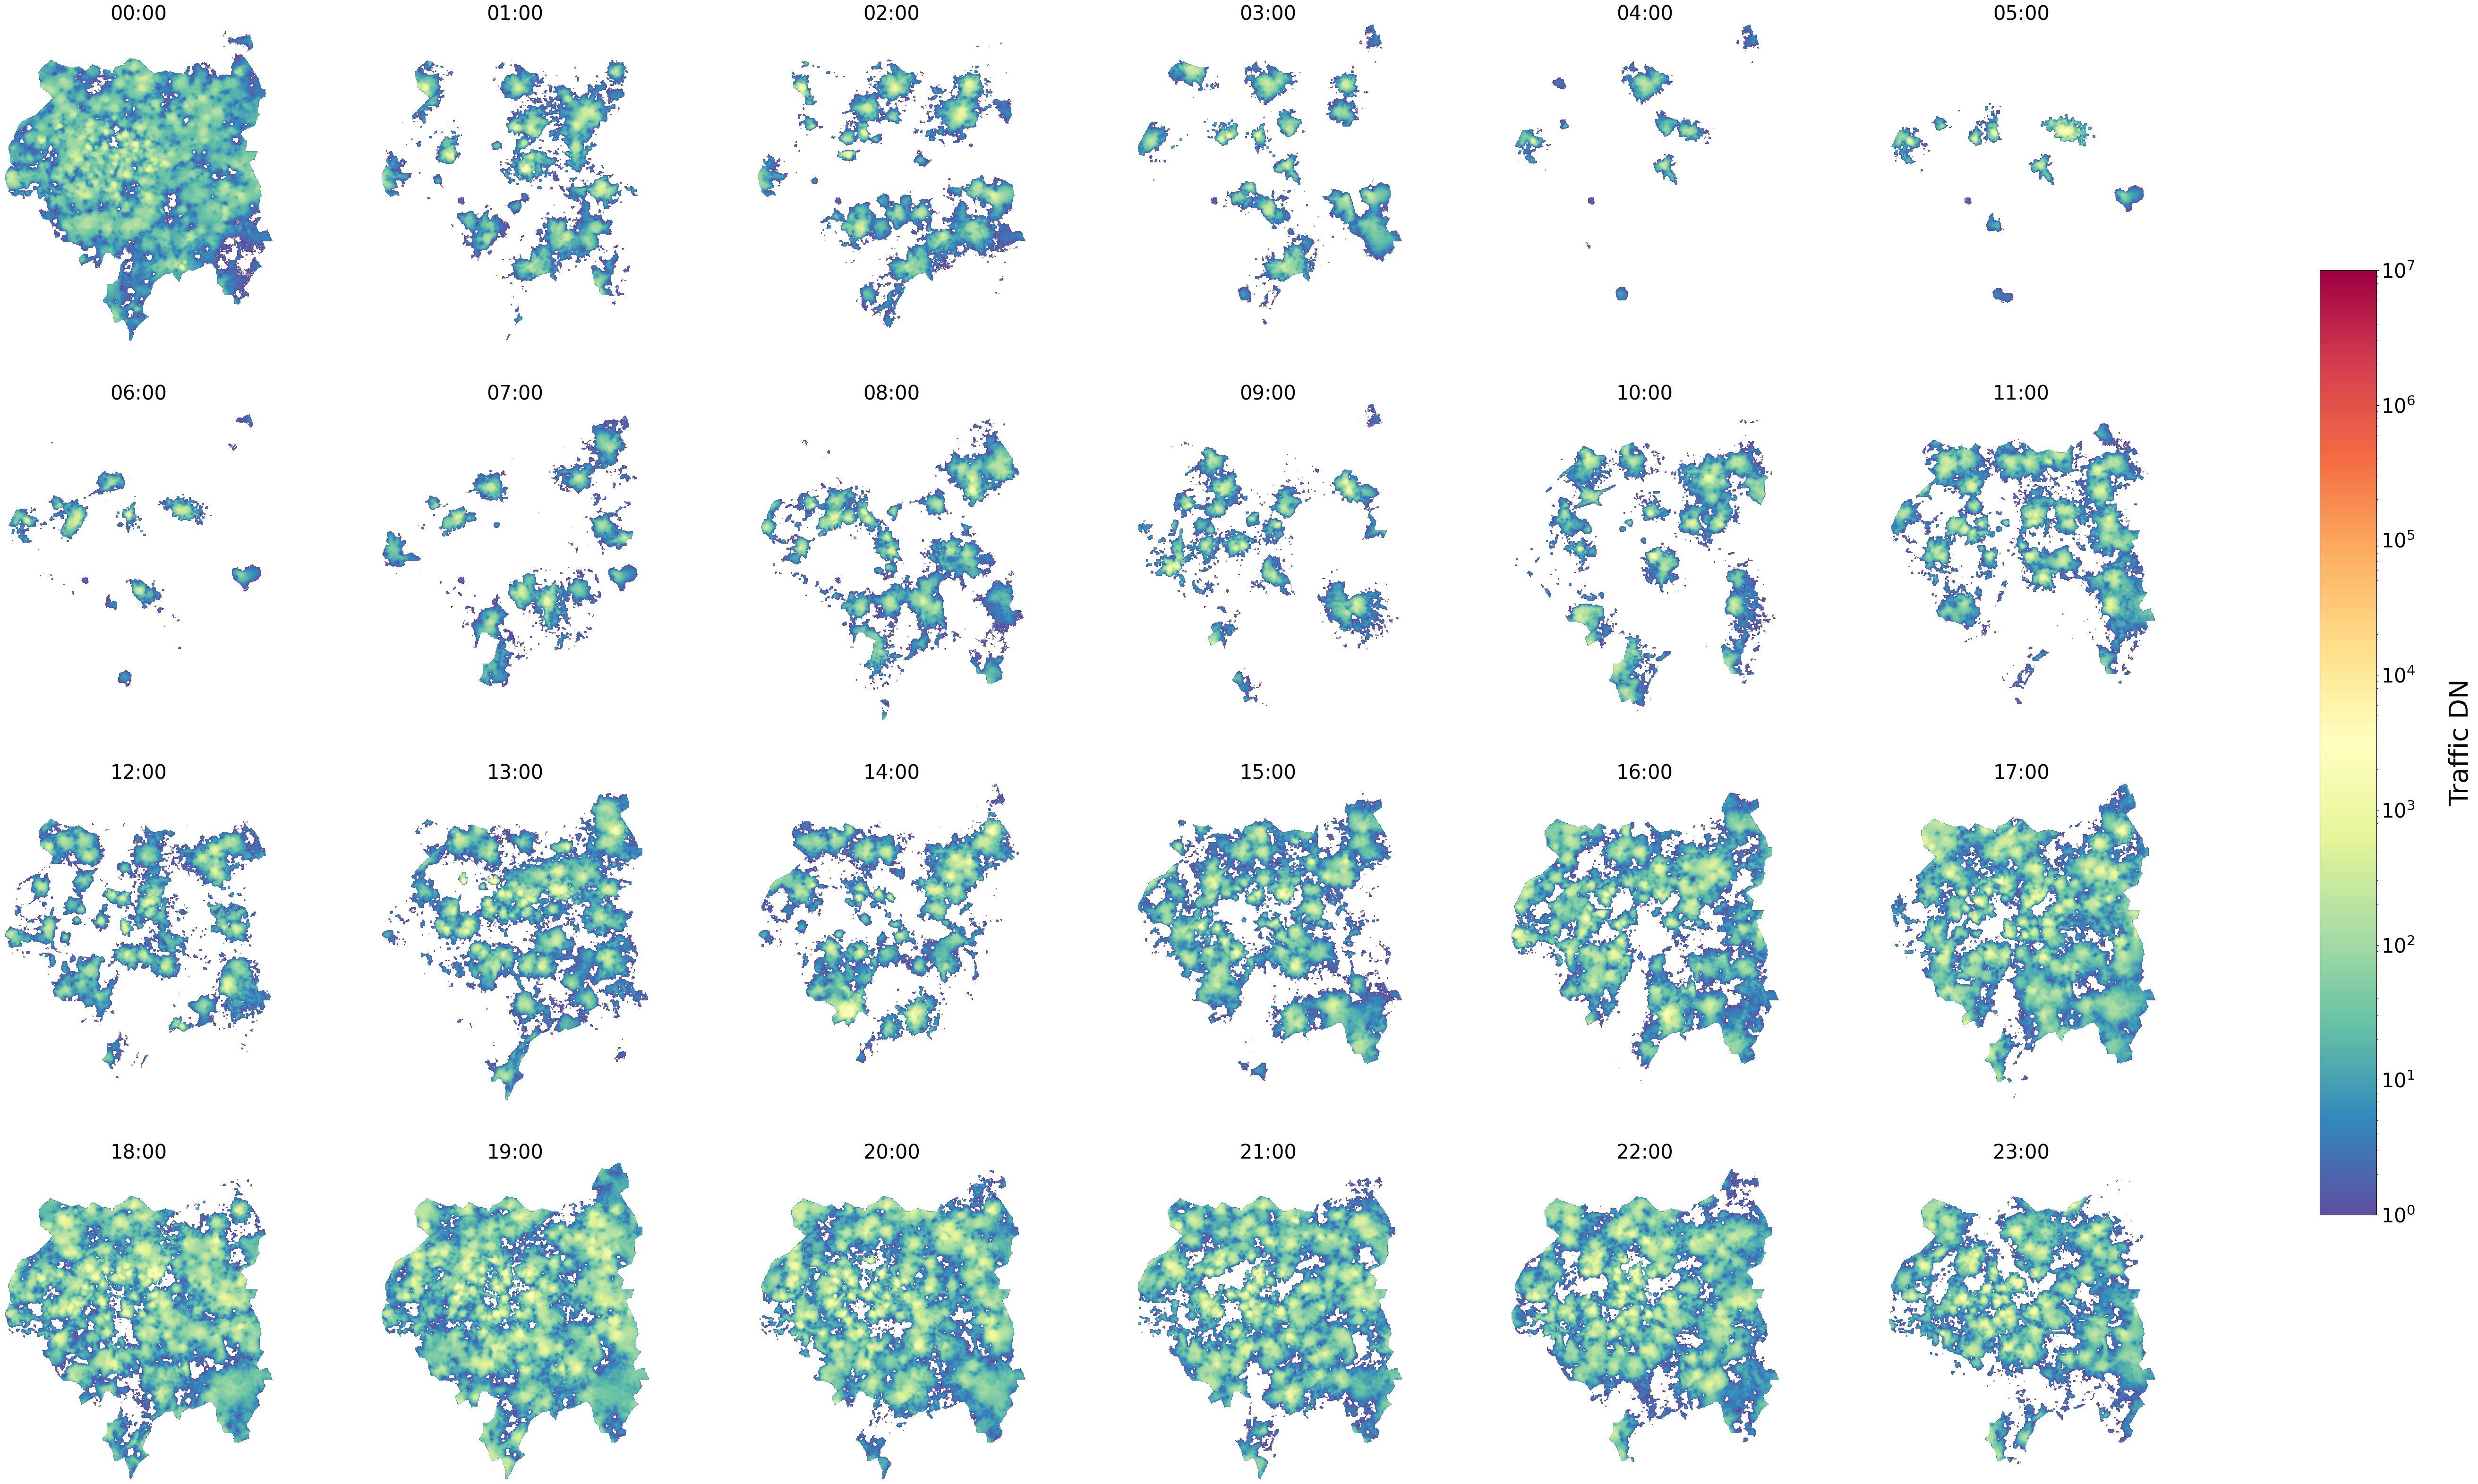

In [6]:
cmap_traffic = cm.get_cmap('Spectral_r').copy()
cmap_traffic.set_under('w', 0)
norm_traffic = colrs.LogNorm(vmin=1e0, vmax=1e7)

# let's plot the traffic map of the city for the first 15 min of each hour
fig, axs = plt.subplots(4, 6, figsize=(60, 40))
axs = axs.flatten()

for hour in range(24):
    ax = axs[hour]

    #recall that we have 15 min intervals, so we need to multiply the hour by 4
    city_traffic_time = city_traffic[ hour * 4 ] 

    ax.imshow(city_traffic_time, origin='lower', cmap=cmap_traffic, norm=norm_traffic)
    ax.set_title(f'{str(hour).zfill(2)}:00', fontsize=30)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

ax = fig.add_axes([0.95, 0.25, 0.02, .5])
sm = plt.cm.ScalarMappable(cmap=cmap_traffic, norm=norm_traffic)
sm.set_array([])
clb = plt.colorbar(sm, cax=ax, orientation='vertical') 
clb.set_label('Traffic DN', rotation=90, fontsize=40, labelpad=50)
clb.ax.tick_params(labelsize=30)
clb.ax.xaxis.set_ticks_position('default')

plt.show()

## Total traffic time series - YouTube 

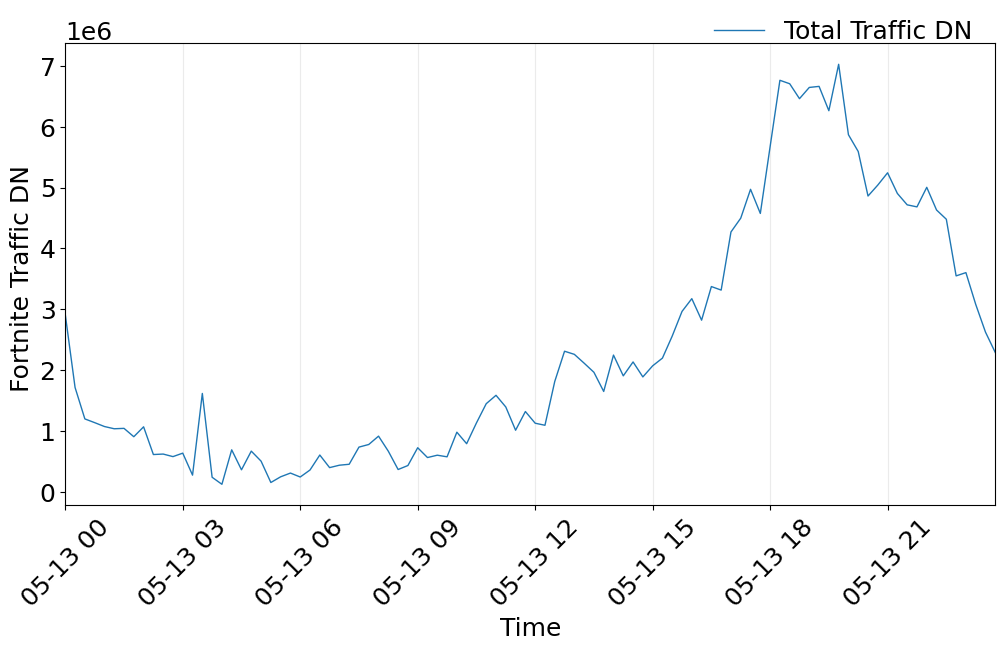

In [7]:
traffic_time_series = city_traffic.sum(axis=(1, 2))

fig = plt.figure(figsize=(12, 6))
plt.plot(times, traffic_time_series, linewidth=1, color='tab:blue', label='Total Traffic DN')
plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=1,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.show()

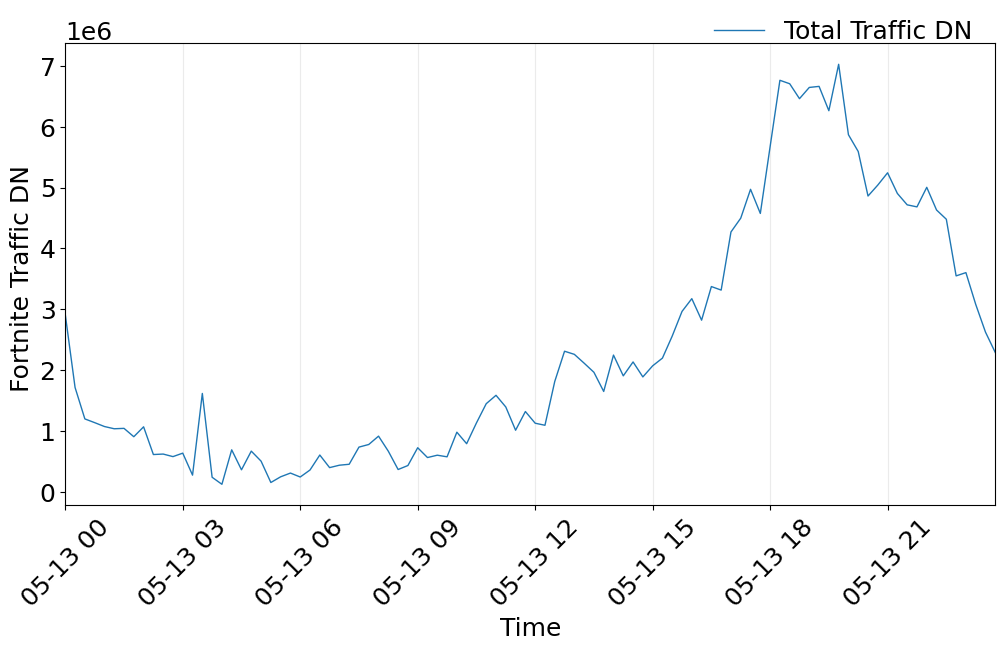

In [8]:
traffic_time_series = city_traffic.sum(axis=(1, 2))

fig = plt.figure(figsize=(12, 6))
plt.plot(times, traffic_time_series, linewidth=1, color='tab:blue', label='Total Traffic DN')
plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=1,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.show()

### Traffic time series for a specific tile

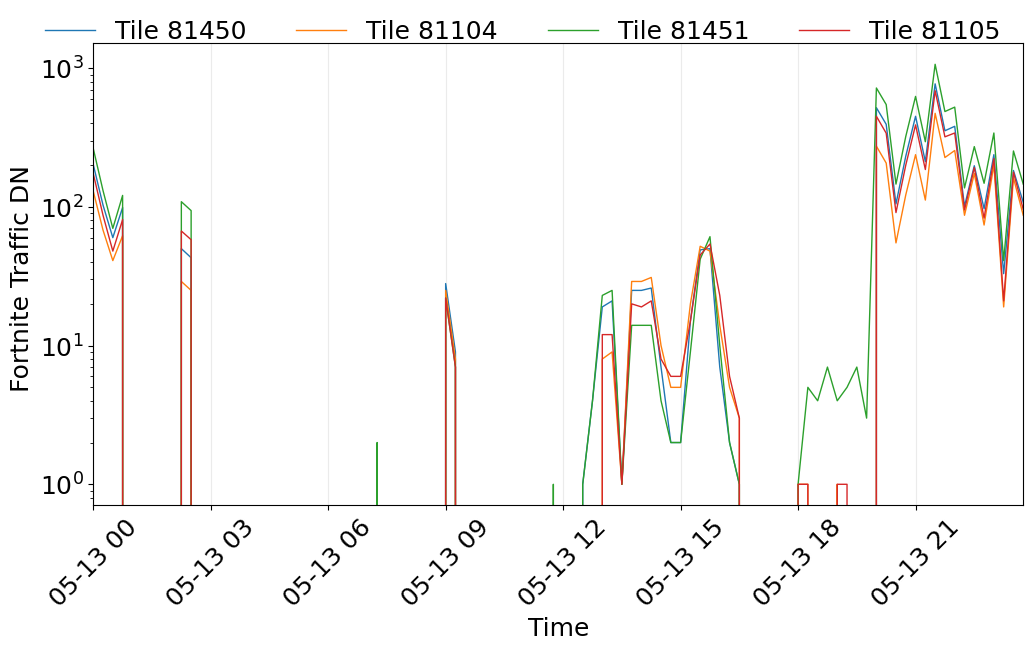

In [9]:
random_tiles = [(235,140), (234, 140), (235, 141), (234, 141)]

plt.figure(figsize=(12, 6))

for random_tile in random_tiles:
    tile_id = random_tile[0] * n_cols + random_tile[1]
    traffic_tile = city_traffic[:, random_tile[0], random_tile[1]]
    plt.plot(times, traffic_tile, linewidth=1, label=f'Tile {tile_id}')

plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=4,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.yscale('log')
plt.show()

## total users of this day

In [10]:
user_traffic = df_traffic_dn.iloc[:, 1:]

total_traffic = user_traffic.to_numpy().sum()

print(f'Total recorded traffic of the given file : {total_traffic}')


Total recorded traffic of the given file : 224124689
